In [29]:
import evo
from evo.core.trajectory import PoseTrajectory3D
from evo.tools import file_interface
from evo.core import sync
import evo.main_ape as main_ape
from evo.core.metrics import PoseRelation
from evo.tools import plot
from evo.core import lie_algebra
from evo.core import geometry
from pathlib import Path
import numpy as np
import logging
from matplotlib import pyplot as  plt
from evo import main_traj
%matplotlib inline

In [30]:
p_raw = Path("/data/jagat/euroc")
p_processed = Path("/data/jagat/processed")
dataset_name = "MH_01_easy"
p_gt = p_raw.joinpath(dataset_name, "mav0", "state_groundtruth_estimate0", "data.csv")
p_vo = p_processed.joinpath(dataset_name, "evo","mono","lba","traj_est_ip_no_prescale_lba.txt")
print(f"Ground truth found: {p_gt.exists()}")
print(f"VO solution found : {p_vo.exists()}")

Ground truth found: True
VO solution found : True


In [31]:
traj_vo = file_interface.read_tum_trajectory_file(p_vo)
traj_gt = file_interface.read_euroc_csv_trajectory(p_gt)

print("Summary of VO trajectory")
traj_vo.get_infos()

Summary of VO trajectory


{'nr. of poses': 3682,
 'path length (m)': 117.10453225383371,
 'pos_start (m)': array([ 3.04188841e-04, -7.90974300e-05,  9.90435015e-04]),
 'pos_end (m)': array([-0.61700636,  0.63358706, -0.42669463]),
 'duration (s)': 184.0499997138977,
 't_start (s)': 1403636579.7635558,
 't_end (s)': 1403636763.8135555}

In [32]:
print("Summary of Ground truth trajectory")
traj_gt.get_infos()

Summary of Ground truth trajectory


{'nr. of poses': 36382,
 'path length (m)': 80.62621184727759,
 'pos_start (m)': array([ 4.688319, -1.786938,  0.783338]),
 'pos_end (m)': array([ 4.572531, -1.942023,  0.61962 ]),
 'duration (s)': 181.90499997138977,
 't_start (s)': 1403636580.8385556,
 't_end (s)': 1403636762.7435555}

In [33]:
traj_est, traj_ref = sync.associate_trajectories(traj_1=traj_gt, traj_2=traj_vo)

In [34]:
print(" VO trajectory")
traj_est.get_infos()

 VO trajectory


{'nr. of poses': 3638,
 'path length (m)': 80.51447030843528,
 'pos_start (m)': array([ 4.687579, -1.786059,  0.80354 ]),
 'pos_end (m)': array([ 4.576851, -1.940303,  0.628568]),
 'duration (s)': 181.85000014305115,
 't_start (s)': 1403636580.8635554,
 't_end (s)': 1403636762.7135556}

In [35]:
print("gt trajectory")
traj_ref.get_infos()
file_interface.write_tum_trajectory_file(file_path=p_processed.joinpath(dataset_name, "evo","mono","lba","tum_file_gt.txt").as_posix(),traj=traj_ref)

gt trajectory


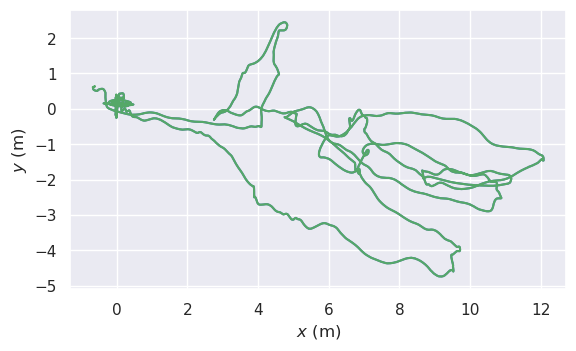

In [36]:
fig = plt.figure()
plot.trajectories(fig, trajectories=[traj_ref, traj_vo])
plt.show()